<a href="https://colab.research.google.com/github/jinglescode/meditorch/blob/master/demo/unet_resnet_drishti_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [0]:
!pip install meditorch

# Data

In [5]:
from meditorch.datasets import Drishti
from torch.utils.data import DataLoader

trainset_drishti = Drishti('./temp_data', train=True)
valset_drishti = Drishti('./temp_data', train=False)

batch_size = 5

dataloaders_drishti = {
    'train': DataLoader(trainset_drishti, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(valset_drishti, batch_size=batch_size, shuffle=False, num_workers=0)
}

0it [00:00, ?it/s]

 99%|█████████▉| 348782592/350597534 [00:12<00:00, 31033581.46it/s]

Extracting ./temp_data/Drishti/Drishti-GS1_files.rar to ./temp_data/Drishti
patool: Extracting ./temp_data/Drishti/Drishti-GS1_files.rar ...
patool: running /usr/bin/unrar x -- /content/meditorch/temp_data/Drishti/Drishti-GS1_files.rar
patool:     with cwd='./temp_data/Drishti'
patool: ... ./temp_data/Drishti/Drishti-GS1_files.rar extracted to `./temp_data/Drishti'.
Finished download and extract
Extracting data from ./temp_data/Drishti/Drishti-GS1_files/Drishti-GS1_files/Training


350601216it [00:30, 31033581.46it/s]                               

Completed extracting `data` and `targets`.
Extracting data from ./temp_data/Drishti/Drishti-GS1_files/Drishti-GS1_files/Test
Completed extracting `data` and `targets`.


In [6]:
from meditorch.nn.models import UNetResNet
from torchsummary import summary

model = UNetResNet(in_channel=3, n_classes=2)

print(model)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth

  0%|          | 0.00/44.7M [00:00<?, ?B/s]
  0%|          | 128k/44.7M [00:00<00:36, 1.28MB/s]
  1%|          | 512k/44.7M [00:00<00:28, 1.60MB/s]
  4%|▍         | 1.93M/44.7M [00:00<00:20, 2.19MB/s]
 15%|█▌        | 6.88M/44.7M [00:00<00:12, 3.07MB/s]
 29%|██▉       | 12.9M/44.7M [00:00<00:07, 4.30MB/s]
 42%|████▏     | 18.7M/44.7M [00:00<00:04, 5.96MB/s]
 55%|█████▍    | 24.6M/44.7M [00:00<00:02, 8.17MB/s]
 68%|██████▊   | 30.4M/44.7M [00:00<00:01, 11.0MB/s]
 82%|████████▏ | 36.4M/44.7M [00:00<00:00, 14.7MB/s]
 95%|█████████▍| 42.4M/44.7M [00:01<00:00, 19.0MB/s]
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.9MB/s]

UNetResNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

Epoch 1/30:
	LR: 0.0001
	train-> bce:0.433398|dice:0.950945|iou:0.004135|loss:0.692172
	val-> bce:0.132223|dice:0.974558|iou:0.000000|loss:0.553391
	Saving best model, epoch loss 0.5533906139579474 < best loss 10000000000.0
	0m 7s
----------
Epoch 2/30:
	LR: 0.0001
	train-> bce:0.071639|dice:0.806053|iou:0.000000|loss:0.438846
	val-> bce:0.065330|dice:0.761467|iou:0.000000|loss:0.413399
	Saving best model, epoch loss 0.41339867722754386 < best loss 0.5533906139579474
	0m 6s
----------
Epoch 3/30:
	LR: 0.0001
	train-> bce:0.045650|dice:0.626472|iou:0.000016|loss:0.336061
	val-> bce:0.048469|dice:0.584638|iou:0.000472|loss:0.316553
	Saving best model, epoch loss 0.3165532420663273 < best loss 0.41339867722754386
	0m 6s
----------
Epoch 4/30:
	LR: 0.0001
	train-> bce:0.035247|dice:0.509899|iou:0.155212|loss:0.272573
	val-> bce:0.039770|dice:0.504632|iou:0.244348|loss:0.272201
	Saving best model, epoch loss 0.27220136628431435 < best loss 0.3165532420663273
	0m 6s
----------
Epoch 5/30:
	L

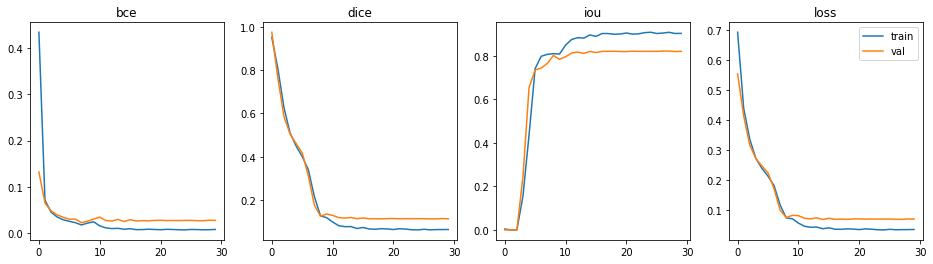

In [7]:
import torch.optim as optim
from torch.optim import lr_scheduler
from meditorch.nn import Trainer

optimizer_func = optim.Adam(model.parameters(), lr=1e-4)

scheduler = lr_scheduler.StepLR(optimizer_func, step_size=10, gamma=0.1)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=scheduler)

trainer.train_model(dataloaders_drishti, num_epochs=30)

In [0]:
images, masks = next(iter(dataloaders_drishti['val']))
preds = trainer.predict(images)

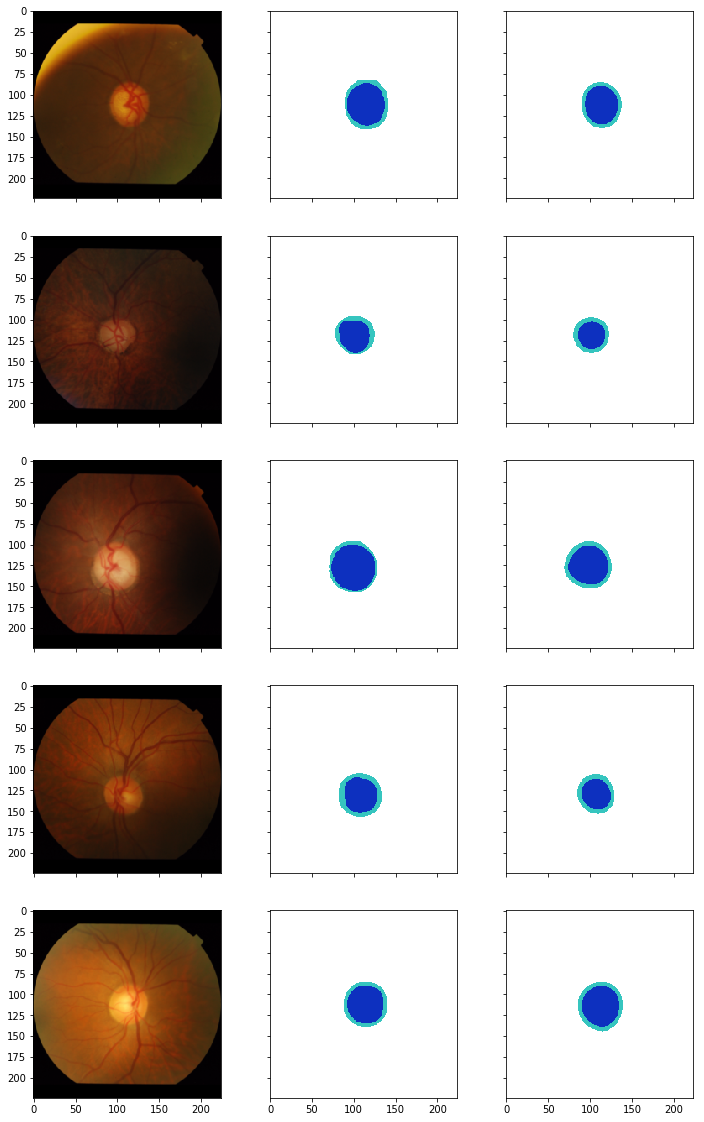

In [9]:
from meditorch.utils.plot import plot_image_truemask_predictedmask
plot_image_truemask_predictedmask(images, masks, preds)